In [8]:
%matplotlib inline

In [9]:
import numpy as np
import lmfit as lm
import matplotlib.pylab as plt

In [10]:
x=np.linspace(-5,5,50)

In [11]:
def gaussian(x, amp, cen, wid):
    "1-d gaussian: gaussian(x, amp, cen, wid)"
    return (amp/(np.sqrt(2*np.pi)*wid)) * np.exp(-(x-cen)**2 /(2*wid**2))

In [12]:
y=gaussian(x,amp=5.0,cen=0.2,wid=1.0)+np.random.normal(0.0,0.1,50)

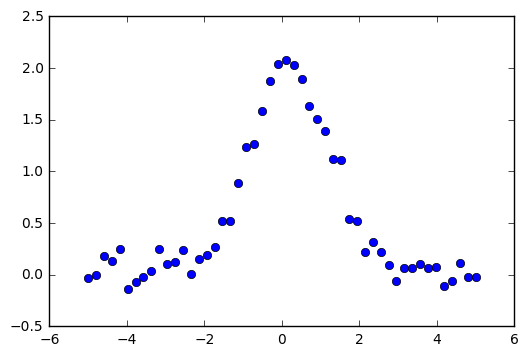

In [13]:
plt.plot(x,y,"o")

In [14]:
from scipy.optimize import curve_fit
init_vals = [5, 0, 1]     # for [amp, cen, wid]
best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)
print(best_vals)
print(covar)

[ 5.22108792  0.1990814   1.02468454]
[[  1.22672887e-02   4.11185557e-11   1.60505418e-03]
 [  4.11185557e-11   6.30016672e-04  -2.88115297e-12]
 [  1.60505418e-03  -2.88115297e-12   6.30016673e-04]]


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 50
    # variables        = 3
    chi-square         = 0.519
    reduced chi-square = 0.011
    Akaike info crit   = -219.348
    Bayesian info crit = -213.612
[[Variables]]
    amp:   5.22108767 +/- 0.110757 (2.12%) (init= 3)
    cen:   0.19908135 +/- 0.025100 (12.61%) (init= 0)
    wid:   1.02468444 +/- 0.025100 (2.45%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, wid)                  =  0.577 



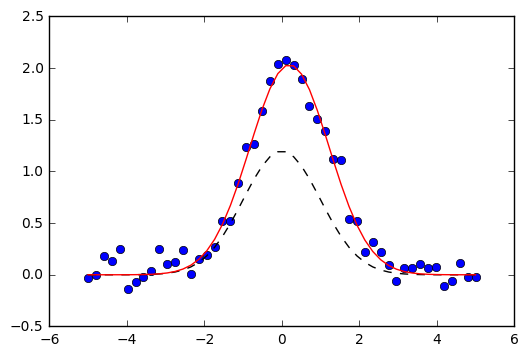

In [15]:
gmod = lm.Model(gaussian)
result = gmod.fit(y, x=x, amp=3, cen=0.0, wid=1)

print(result.fit_report())

plt.plot(x, y,         'bo')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')

In [16]:
def line(x, slope, intercept):
    "a line"
    return slope * x + intercept

In [17]:
mod = lm.Model(gaussian) + lm.Model(line)

In [18]:
ym=gaussian(x,amp=5.0,cen=0.2,wid=1.0)+np.random.normal(0.0,0.1,50)+0.5+0.05*x

[[Model]]
    (Model(gaussian) + Model(line))
[[Fit Statistics]]
    # function evals   = 33
    # data points      = 50
    # variables        = 5
    chi-square         = 0.347
    reduced chi-square = 0.008
    Akaike info crit   = -233.283
    Bayesian info crit = -223.723
[[Variables]]
    amp:         5.14558837 +/- 0.132753 (2.58%) (init= 5)
    cen:         0.17539874 +/- 0.021482 (12.25%) (init= 0)
    wid:         1.00234956 +/- 0.024082 (2.40%) (init= 0.8)
    slope:       0.05603631 +/- 0.004405 (7.86%) (init= 0)
    intercept:   0.46434394 +/- 0.017983 (3.87%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, intercept)            = -0.723 
    C(amp, wid)                  =  0.716 
    C(wid, intercept)            = -0.518 
    C(cen, slope)                = -0.285 



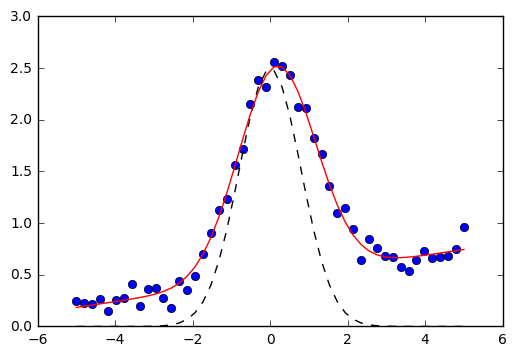

In [19]:
result = mod.fit(ym, x=x, amp=5, cen=0.0, wid=0.8, slope=0, intercept=0)
print(result.fit_report())
plt.plot(x, ym,         'bo')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')

[[Model]]
    Model(gaussian, prefix='g1_')
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 50
    # variables        = 3
    chi-square         = 0.519
    reduced chi-square = 0.011
    Akaike info crit   = -219.348
    Bayesian info crit = -213.612
[[Variables]]
    g1_center:      0.19908069 +/- 0.025099 (12.61%) (init= 0.3061224)
    g1_amplitude:   5.22108451 +/- 0.110756 (2.12%) (init= 5.439968)
    g1_sigma:       1.02468320 +/- 0.025099 (2.45%) (init= 1.22449)
    g1_fwhm:        2.41294450 +/- 0.059104 (2.45%)  == '2.3548200*g1_sigma'
    g1_height:      2.03273700 +/- 0.043120 (2.12%)  == '0.3989423*g1_amplitude/g1_sigma'
[[Correlations]] (unreported correlations are <  0.100)
    C(g1_amplitude, g1_sigma)    =  0.577 



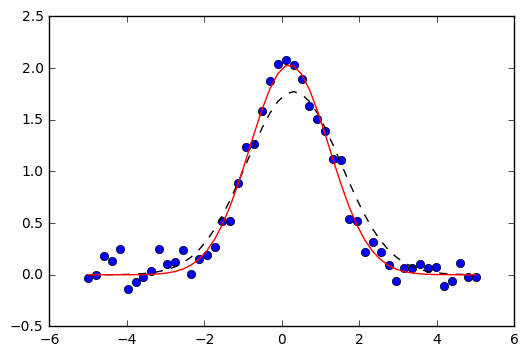

In [20]:
EvenBetterModel=lm.models.GaussianModel(prefix="g1_")
pars=EvenBetterModel.guess(y,x=x)
result=EvenBetterModel.fit(y,pars,x=x)
print(result.fit_report())
plt.plot(x, y,         'bo')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')

In [21]:
def twoGaussians(x,amp,cen1,cen2,wid):
    return np.array([gaussian(x,amp,cen1,wid),gaussian(x,amp,cen2,wid)]).flatten()

In [22]:
g1=gaussian(x,amp=5.0,cen=0.2,wid=1.0)+np.random.normal(0.0,0.1,50)
g2=gaussian(x,amp=5.0,cen=1.1,wid=1.0)+np.random.normal(0.0,0.1,50)

In [23]:
g=np.array([g1,g2]).flatten()

In [24]:
twoG=lm.Model(twoGaussians)

In [25]:
result2g=twoG.fit(g,x=x,amp=4.0,cen1=0.0,cen2=1.0,wid=2.0)
print(result2g.fit_report())

[[Model]]
    Model(twoGaussians)
[[Fit Statistics]]
    # function evals   = 34
    # data points      = 100
    # variables        = 4
    chi-square         = 0.857
    reduced chi-square = 0.009
    Akaike info crit   = -463.914
    Bayesian info crit = -453.493
[[Variables]]
    amp:    5.02310836 +/- 0.069881 (1.39%) (init= 4)
    cen1:   0.21228541 +/- 0.022915 (10.79%) (init= 0)
    cen2:   1.11490763 +/- 0.022915 (2.06%) (init= 1)
    wid:    1.00867473 +/- 0.016203 (1.61%) (init= 2)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, wid)                  =  0.577 

